<a href="https://colab.research.google.com/github/corochena/risk_analysis/blob/main/risk_analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import random
import numpy as np
import matplotlib.pyplot as plt

En el diccionario dist tengo todas las variables pertinentes y a cada una la acompañan dos listas, v_list es una lista de posibles valores que tomara dicha variable y w_list indica el peso relativo de que tome dicho valor.

In [48]:
dist = {
    "grow_rate": {
        "v_list": [-0.03, -0.02, 0, 0.02, 0.03],
        "w_list": [5, 10, 25, 40, 20]
    },
    "market_share": {
        "v_list": [0.05, 0.06, 0.08, 0.1, 0.12],
        "w_list": [5, 10, 25, 40, 20]
    },
    "investment": {
        "v_list": [5, 6, 6.5, 7, 8],
        "w_list": [5, 20, 30, 40, 5]
    },
    "price": {
        "v_list": [250, 300, 380],
        "w_list": [20, 50, 30]
    },
    "life": {
        "v_list": [2, 3, 4, 7, 10],
        "w_list": [10, 20, 40, 20, 10]
    },
    "cvu": {
        "v_list": [200, 220, 240, 250, 260],
        "w_list": [20, 20, 20, 30, 10]
    },
    "i": {
        "v_list": [0.03, 0.05, 0.07, 0.1, 0.12],
        "w_list": [5, 10, 40, 25, 20]
    },
    "tax_rate": {
        "v_list": [0.35],
        "w_list": [1]
    },
    "market_size": {
        "v_list": [750000],
        "w_list": [1]
    },
    "salvage_value": {
        "v_list": [2],
        "w_list": [1]
    },
    "fixed_cost": {
        "v_list": [1],
        "w_list": [1]
    }
}

La funcion random_variables devuelve un diccionario con llaves de todas las variables pertinentes y un valor para cada una tomada a azar pero respetando la probabilidad dada en dict.

Uso random.choices y como devuelve una lista con un solo elemento lo acceso mediante [0]


In [49]:
def random_variables(distributions):
  variables = {}
 
  for key in distributions:
    d = distributions[key]
    variables[key] = random.choices(d["v_list"], d["w_list"])[0]
    
  return variables

Aca uso la función enumerate para calcular el van dado una tasa de descuento y una serie de flujos.
Una alternativa sería usar una list comprehension y la función sum.

In [50]:
def vna(rate, flows):
  s = 0
  for i, flow in enumerate(flows):
    s += flow * (1 + rate)**(-i)
  return s

La funcion flows devuelve una lista que representa una serie de flujos de efectivo. Esta función es la que se deberá modificar según lo requiera el problema.

In [57]:
def flows():
  data = random_variables(dist)
  
  grow_rate = data["grow_rate"]
  market_share = data["market_share"]
  investment = data["investment"]
  price = data["price"]
  unit_cost = data["cvu"]
  life = data["life"]
  rate = data["i"]
  tax_rate = data["tax_rate"]
  market_size = data["market_size"]
  salvage_value = data["salvage_value"]
  fixed_cost = data["fixed_cost"]

 
  flow_list = [-investment]
  units = market_share * market_size
 
  for i in range(1, life + 1):
    income = units * price / 1e6
    variable_costs = units * unit_cost / 1e6
    deprec = investment / life
    uai = income - variable_costs - fixed_cost - deprec
    if uai > 0:
      taxes = uai * tax_rate
    else:
      taxes = 0
    net_income = uai - taxes
 
    flow = net_income + deprec
    if i == life:
      flow += salvage_value
 
    flow_list.append(flow)
 
    units *= 1 + grow_rate
 
  return flow_list, rate, data

En la lista full_list guardo el van, los datos de las variables y los flujos generados.

In [101]:
full_list = []
for i in range(5000):
  f, rate, data = flows()
  full_list.append((vna(rate, f), data, f))

Aca uso la funcion hist del modulo pyplot para crear un histograma.
Para que muestre las frecuencias relativas se usa weights, bins usa una secuencia y rwidth es para separar un poco las columnas.

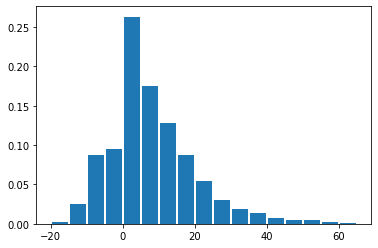

In [109]:
van_list = list(map(lambda elem: elem[0], full_list))
van_array = np.array(van_list)
# hist, bin_edges = np.histogram(van_array)
niter = len(van_array)
n, bins, patches = plt.hist(x=van_array, weights=[1/niter]*niter, bins = range(-20, 70, 5), rwidth = 0.9)

In [64]:
outfile = open('van_samples.txt', 'w')
#values1 = random.choices([-3, -2, 0, 2, 3], [5,10,25,40,20], k = 5000)
#values2 = np.random.choice([-3,-2,0,2,3], p = [0.05,0.10,0.25,0.40,0.20], size = 5000)
 
#for val1, val2 in zip(values1, values2):
  #outfile.write(str(val1) + ',' + str(val2) + '\n')

for van in full_list:
  outfile.write(str(van) + '\n')

In [107]:
print([1/len(van_array)]*len(van_array))

[0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,